<a href="https://colab.research.google.com/github/opmyukesh/assignment-1/blob/main/assignment1(rfe).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('/content/train.csv')

<ipython-input-2-a43e47edc79e>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/train.csv')


In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
cols_to_convert = [
    "Annual_Income", "Monthly_Balance", "Amount_invested_monthly",
    "Num_of_Loan", "Outstanding_Debt", "Changed_Credit_Limit",
    "Num_of_Delayed_Payment"
]

df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
+

In [ ]:
df=df.drop(columns=['ID','Age','Customer_ID','Name','Month','SSN','Occupation','Type_of_Loan','Credit_Utilization_Ratio','Credit_History_Age',])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Annual_Income            93020 non-null   float64
 1   Monthly_Inhand_Salary    84998 non-null   float64
 2   Num_Bank_Accounts        100000 non-null  int64  
 3   Num_Credit_Card          100000 non-null  int64  
 4   Interest_Rate            100000 non-null  int64  
 5   Num_of_Loan              95215 non-null   float64
 6   Delay_from_due_date      100000 non-null  int64  
 7   Num_of_Delayed_Payment   90254 non-null   float64
 8   Changed_Credit_Limit     97909 non-null   float64
 9   Num_Credit_Inquiries     98035 non-null   float64
 10  Credit_Mix               100000 non-null  object 
 11  Outstanding_Debt         98991 non-null   float64
 12  Payment_of_Min_Amount    100000 non-null  object 
 13  Total_EMI_per_month      100000 non-null  float64
 14  Amoun

In [ ]:
object_cols=df.select_dtypes(include=['object'])
float_cols=df.select_dtypes(include=['float64'])
int_cols=df.select_dtypes(include=['int64'])

In [ ]:
int_cols

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date
0,3,4,3,3
1,3,4,3,-1
2,3,4,3,3
3,3,4,3,5
4,3,4,3,6
...,...,...,...,...
99995,4,6,7,23
99996,4,6,7,18
99997,4,6,5729,27
99998,4,6,7,20


In [ ]:
float_cols

,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,19114.12,1824.843333,4.0,7.0,11.27,4.0,809.98,49.574949,80.415295,312.494089
1,19114.12,NaN,4.0,NaN,11.27,4.0,809.98,49.574949,118.280222,284.629162
2,19114.12,NaN,4.0,7.0,NaN,4.0,809.98,49.574949,81.699521,331.209863
3,19114.12,NaN,4.0,4.0,6.27,4.0,809.98,49.574949,199.458074,223.451310
4,19114.12,1824.843333,4.0,NaN,11.27,4.0,809.98,49.574949,41.420153,341.489231
...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,3359.415833,2.0,7.0,11.50,3.0,502.38,35.104023,60.971333,479.866228
99996,39628.99,3359.415833,2.0,7.0,11.50,3.0,502.38,35.104023,54.185950,496.651610
99997,39628.99,3359.415833,2.0,6.0,11.50,3.0,502.38,35.104023,24.028477,516.809083
99998,39628.99,3359.415833,2.0,NaN,11.50,3.0,502.38,35.104023,251.672582,319.164979


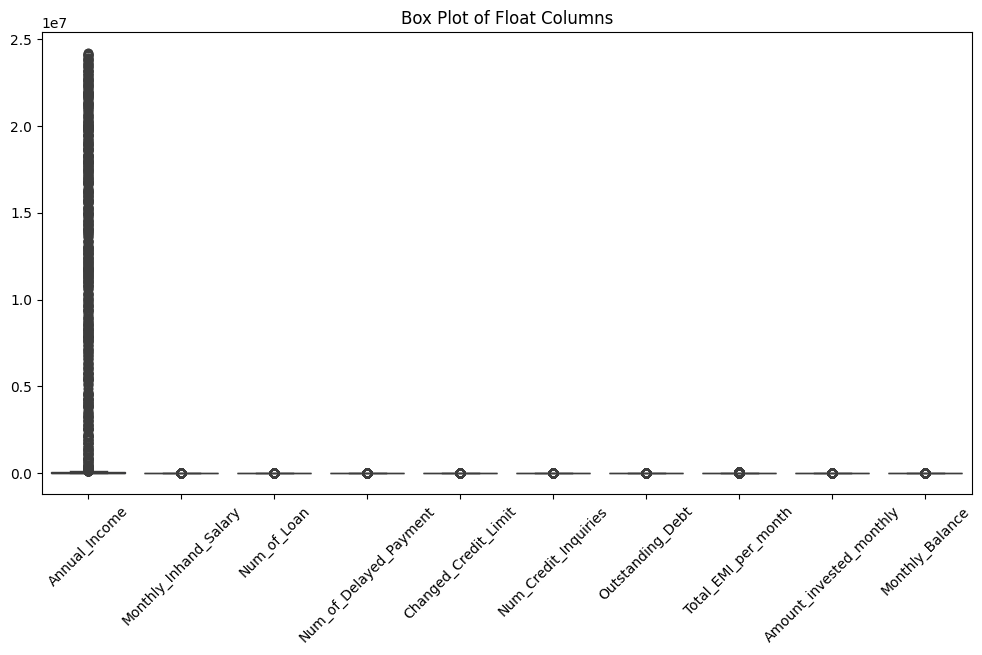

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=float_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of Float Columns")
plt.show()

In [ ]:
outlier_counts = {}
for col in float_cols.columns:
    Q1 = float_cols[col].quantile(0.25)
    Q3 = float_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((float_cols[col] < lower_bound) | (float_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

In [ ]:
outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                         Outlier Count
Annual_Income                     2562
Monthly_Inhand_Salary             1683
Num_of_Loan                       4323
Num_of_Delayed_Payment             717
Changed_Credit_Limit               668
Num_Credit_Inquiries              1650
Outstanding_Debt                  5214
Total_EMI_per_month               6795
Amount_invested_monthly           7568
Monthly_Balance                   7627


In [ ]:
def cap_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

In [ ]:
float_cols = cap_outliers(float_cols)

In [ ]:
outlier_counts = {}
for col in float_cols.columns:
    Q1 = float_cols[col].quantile(0.25)
    Q3 = float_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((float_cols[col] < lower_bound) | (float_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers
    outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                         Outlier Count
Annual_Income                        0
Monthly_Inhand_Salary                0
Num_of_Loan                          0
Num_of_Delayed_Payment               0
Changed_Credit_Limit                 0
Num_Credit_Inquiries                 0
Outstanding_Debt                     0
Total_EMI_per_month                  0
Amount_invested_monthly              0
Monthly_Balance                      0


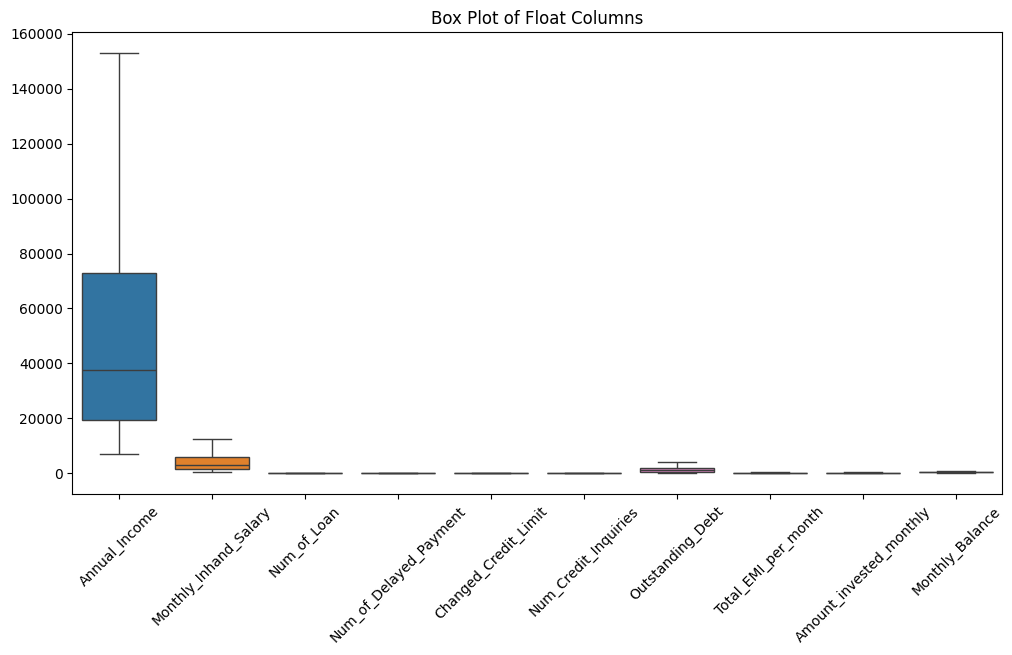

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=float_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of Float Columns")
plt.show()

In [ ]:
object_cols.isnull().sum()

,0
Credit_Mix,0
Payment_of_Min_Amount,0
Payment_Behaviour,0
Credit_Score,0


In [ ]:
object_cols.fillna(object_cols.mode().iloc[0], inplace=True)

In [ ]:
object_cols.isnull().sum()

,0
Credit_Mix,0
Payment_of_Min_Amount,0
Payment_Behaviour,0
Credit_Score,0


In [ ]:
object_cols

,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,_,No,High_spent_Small_value_payments,Good
1,Good,No,Low_spent_Large_value_payments,Good
2,Good,No,Low_spent_Medium_value_payments,Good
3,Good,No,Low_spent_Small_value_payments,Good
4,Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...
99995,_,No,High_spent_Large_value_payments,Poor
99996,_,No,High_spent_Medium_value_payments,Poor
99997,Good,No,High_spent_Large_value_payments,Poor
99998,Good,No,Low_spent_Large_value_payments,Standard


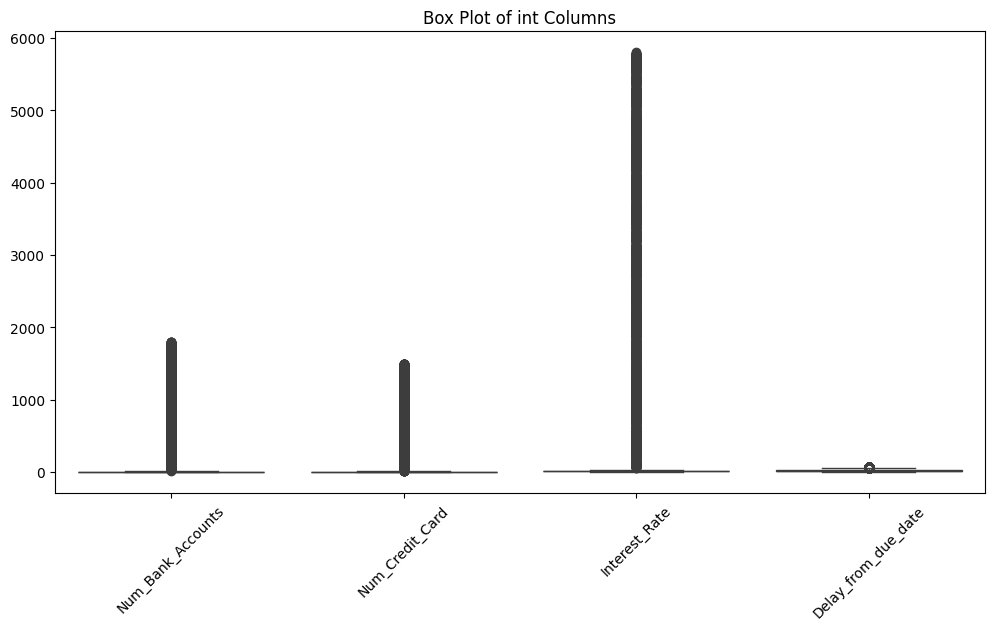

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=int_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of int Columns")
plt.show()

In [ ]:
outlier_counts = {}
for col in int_cols.columns:
    Q1 = int_cols[col].quantile(0.25)
    Q3 = int_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((int_cols[col] < lower_bound) | (int_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers
    outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                     Outlier Count
Num_Bank_Accounts             1315
Num_Credit_Card               2271
Interest_Rate                 2034
Delay_from_due_date           4002


In [ ]:
int_cols = cap_outliers(int_cols)

In [ ]:
outlier_counts = {}
for col in int_cols.columns:
    Q1 = int_cols[col].quantile(0.25)
    Q3 = int_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((int_cols[col] < lower_bound) | (int_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers
    outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                     Outlier Count
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Delay_from_due_date              0


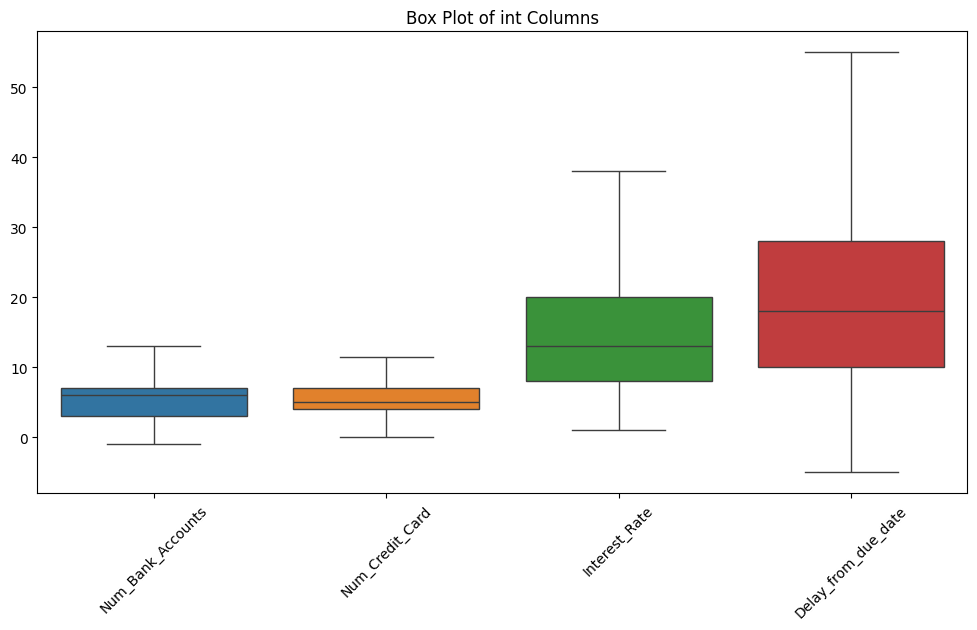

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=int_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of int Columns")
plt.show()

In [ ]:
float_cols.isnull().sum()

,0
Annual_Income,6980
Monthly_Inhand_Salary,15002
Num_of_Loan,4785
Num_of_Delayed_Payment,9746
Changed_Credit_Limit,2091
Num_Credit_Inquiries,1965
Outstanding_Debt,1009
Total_EMI_per_month,0
Amount_invested_monthly,8784
Monthly_Balance,1209


float_cols.info()

In [ ]:
float_cols.fillna(float_cols.mean(), inplace=True)

In [ ]:
float_cols.isnull().sum()

,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_of_Loan,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0
Outstanding_Debt,0
Total_EMI_per_month,0
Amount_invested_monthly,0
Monthly_Balance,0


In [ ]:
int_cols.isnull().sum()

,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Delay_from_due_date,0


In [ ]:
df = pd.concat([object_cols, float_cols,int_cols], axis=1)

In [ ]:
encoder = LabelEncoder()
for col in ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
X=df[['Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Annual_Income','Monthly_Inhand_Salary','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate']]
y=df[['Credit_Score']]

In [ ]:
X1=X.select_dtypes(include=[np.number])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)
X_scaled = pd.DataFrame(X_scaled, columns=X1.columns)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

In [ ]:
if X.shape[1] == 0:
    raise ValueError("X_scaled has no valid features after preprocessing!")

In [ ]:
if X.shape[1] < 2:
    raise ValueError("VIF calculation requires at least two features.")

In [ ]:
def vif_interpretation(vif):
    if vif == 1:
        return "No multicollinearity"
    elif 1 < vif < 5:
        return "Moderate correlation (Acceptable)"
    elif 5 <= vif < 10:
        return "Potential multicollinearity concern"
    else:
        return "Serious multicollinearity (Needs correction)"

In [ ]:
vif_data["Interpretation"] = vif_data["VIF"].apply(vif_interpretation)

In [ ]:
vif_data

,Feature,VIF,Interpretation
0,Credit_Mix,1.200643,Moderate correlation (Acceptable)
1,Payment_of_Min_Amount,1.301041,Moderate correlation (Acceptable)
2,Payment_Behaviour,1.493077,Moderate correlation (Acceptable)
3,Annual_Income,4.706034,Moderate correlation (Acceptable)
4,Monthly_Inhand_Salary,4.629806,Moderate correlation (Acceptable)
5,Num_of_Loan,1.633003,Moderate correlation (Acceptable)
6,Num_of_Delayed_Payment,1.603530,Moderate correlation (Acceptable)
7,Changed_Credit_Limit,1.344277,Moderate correlation (Acceptable)
8,Num_Credit_Inquiries,1.718327,Moderate correlation (Acceptable)
9,Outstanding_Debt,2.405042,Moderate correlation (Acceptable)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
from sklearn.feature_selection import RFE
num_features = 6
selector = RFE(DecisionTreeClassifier(random_state=42), n_features_to_select=num_features)
selector.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=6)

In [ ]:
X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

In [ ]:
selected_features = X_train.columns[selector.get_support()]

In [ ]:
print(f'Selected {num_features} Features:', list(selected_features))

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_rfe, y_train)
y_pred = clf.predict(X_test_rfe)
acc = accuracy_score(y_test, y_pred)

print(f'Accuracy with {num_features} selected features: {acc:.4f}')

Selected 6 Features: ['Credit_Mix', 'Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
Accuracy with 6 selected features: 0.6435


In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.68
              precision    recall  f1-score   support

        Good       0.59      0.60      0.59      3527
        Poor       0.66      0.66      0.66      5874
    Standard       0.72      0.72      0.72     10599

    accuracy                           0.68     20000
   macro avg       0.66      0.66      0.66     20000
weighted avg       0.68      0.68      0.68     20000



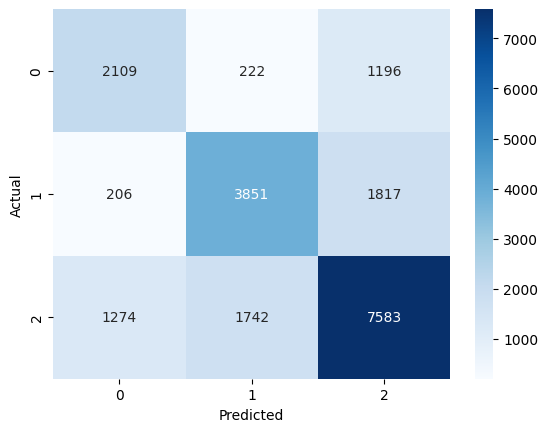

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def run_decisionTree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

for index in range(1, 31):
    sel = RFE(DecisionTreeClassifier(random_state=0), n_features_to_select=index)
    sel.fit(X_train, y_train)
    X_train_rfe = sel.transform(X_train)
    X_test_rfe = sel.transform(X_test)

    selected_columns = X_train.columns[sel.support_]
    print(f'Selected {index} Feature(s): {list(selected_columns)}')
    run_decisionTree(X_train_rfe, X_test_rfe, y_train, y_test)
    print()


Selected 1 Feature(s): ['Outstanding_Debt']
Accuracy: 0.78195

Selected 2 Feature(s): ['Changed_Credit_Limit', 'Outstanding_Debt']
Accuracy: 0.74175

Selected 3 Feature(s): ['Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly']
Accuracy: 0.6232

Selected 4 Feature(s): ['Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly']
Accuracy: 0.67015

Selected 5 Feature(s): ['Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
Accuracy: 0.6549

Selected 6 Feature(s): ['Credit_Mix', 'Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
Accuracy: 0.64235

Selected 7 Feature(s): ['Credit_Mix', 'Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
Accuracy: 0.6548

Selected 8 Feature(s): ['Credit_Mix', 'Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_E

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=17 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 17 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=18 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 18 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=19 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 19 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=20 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 20 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=21 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 21 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=22 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 22 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=23 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 23 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=24 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 24 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=25 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 25 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=26 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 26 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=27 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 27 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=28 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 28 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=29 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 29 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=30 > n_features=16. There will be no feature selection and all features will be kept.
  warnings.warn(


Selected 30 Feature(s): ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
Accuracy: 0.6802



In [ ]:
import pickle
filename = 'assignment1.sav'
pickle.dump(model, open(filename, 'wb'))
